**Import libraries**

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**Read dataset**

In [2]:
dataset = pd.read_csv("/kaggle/input/d/raadghazialzaeem/car-price-prediction-dataset/dataset.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [4]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 4201 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4213 non-null   object 
 1   Location           4213 non-null   object 
 2   Year               4213 non-null   int64  
 3   Kilometers_Driven  4213 non-null   int64  
 4   Fuel_Type          4213 non-null   object 
 5   Transmission       4213 non-null   object 
 6   Owner_Type         4213 non-null   object 
 7   Mileage            4212 non-null   object 
 8   Engine             4189 non-null   object 
 9   Power              4189 non-null   object 
 10  Seats              4185 non-null   float64
 11  New_Price          580 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 427.9+ KB


**Exploratory Data Analysis**

In [6]:
X_train["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: count, Length: 1592, dtype: int64

In [7]:
do_train = X_train["Name"].str.split(" ", expand = True)
do_test = X_test["Name"].str.split(" ", expand = True)

In [8]:
X_train["Manufacturer"] = do_train[0]
X_test["Manufacturer"] = do_test[0]

Text(0, 0.5, 'Tabulate the quantity of automobiles')

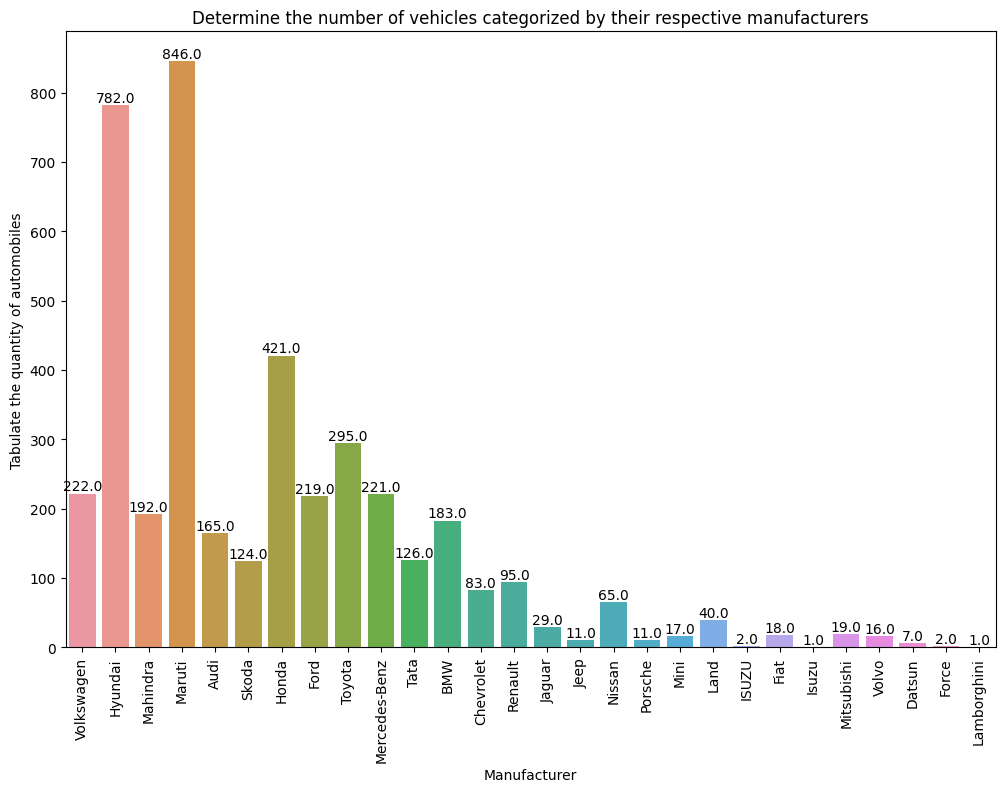

In [9]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Determine the number of vehicles categorized by their respective manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Tabulate the quantity of automobiles")

The dataset exhibits the highest number of cars produced by the manufacturer **Maruti**, and there are no instances of missing values.

In [10]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [11]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

In [12]:
#The variable "Year" holds no inherent significance unless we analyze it to determine the age of a car, influencing potential impacts on its resale value.

curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

**Fuel_Type, Transmission, and Owner_Type**
All these columns are categorical columns which should be converted to dummy variables before being used.

**Kilometers_Driven**

In [13]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

In [14]:
X_train[['Mileage_Value', 'Mileage_Unit']] = X_train['Mileage'].str.split(expand=True)
X_test[['Mileage_Value', 'Mileage_Unit']] = X_test['Mileage'].str.split(expand=True)

X_train['Mileage'] = pd.to_numeric(X_train['Mileage_Value'], errors='coerce')
X_test['Mileage'] = pd.to_numeric(X_test['Mileage_Value'], errors='coerce')

# Drop intermediate columns if needed
X_train.drop(['Mileage_Value', 'Mileage_Unit'], axis=1, inplace=True)
X_test.drop(['Mileage_Value', 'Mileage_Unit'], axis=1, inplace=True)

In [15]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


In [16]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [17]:
def extract_numeric_part(data, column):
    data[column] = data[column].str.split(" ", expand=True)[0]  # Extract first part directly
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric

# Apply the function to both columns in both DataFrames
for df in [X_train, X_test]:
    extract_numeric_part(df, 'Engine')
    extract_numeric_part(df, 'Power')

In [18]:
def fill_missing_with_mean(data, columns):
    for column in columns:
        mean_value = data[column].astype("float64").mean()
        data[column].fillna(mean_value, inplace=True)

# Apply the function to both DataFrames
fill_missing_with_mean(X_train, ["Engine", "Power", "Seats"])
fill_missing_with_mean(X_test, ["Engine", "Power", "Seats"])

In [19]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

**Data Processing**

In [20]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [21]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [22]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [23]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

**Training and predicting**

In [24]:

# Create and fit the model
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linearRegression.predict(X_test)

# Calculate and print R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)  # Print the R-squared value

# Print model coefficients for interpretation
print("Model coefficients:\n", linearRegression.coef_)

R-squared: 0.7008753339360373
Model coefficients:
 [-3.2024792  -0.53654814 -0.56352308  1.26979282  4.37603214  0.05842877
 -0.35177362 -1.39416196 -0.44553453 -0.63116474 -0.31015978 -1.9827897
 -3.11907444 -3.64565231 -0.31808928 -0.15811326  0.43451498 -0.46620612
  0.90592791  1.30148724 -2.54003639 -3.30242137 -0.03892202  0.32603596
 -0.5920364  -1.1959435   0.78132794 -1.47132343 -1.69689857 -1.75495015
 -2.15002513 -2.24747853 -0.34946646  0.24405657  0.22293835  0.10927736
 -0.37491724  0.04304497  0.0525248  -0.07565166  0.10267988]


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
# Create and fit the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print evaluation metrics
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Consider additional metrics (optional) print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Print feature importances for interpretation
print("Feature importances:\n", rf.feature_importances_)

# Explore hyperparameter tuning (optional)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

R-squared: 0.8814158400008079
Root Mean Squared Error: 3.8191220837339666
Feature importances:
 [1.59233339e-01 5.01094677e-02 2.12837507e-02 5.25160741e-02
 6.48144731e-01 9.32744365e-03 2.02107058e-03 2.62562163e-04
 2.08364303e-06 1.02774366e-05 5.30421863e-08 6.06203172e-04
 1.17492232e-03 8.27245004e-04 4.74843370e-06 7.20961394e-05
 1.67434018e-03 3.44901185e-04 1.66723744e-04 2.41348623e-02
 1.15882420e-03 1.83622049e-04 5.22442718e-03 3.42468423e-03
 1.10308255e-04 4.77426232e-05 6.98611857e-04 1.25607381e-04
 5.84449980e-04 2.59097605e-04 1.64399043e-03 8.36701044e-04
 1.80485218e-04 1.48828970e-03 7.28908511e-05 6.45762844e-07
 1.96973956e-03 7.99810459e-03 2.46208784e-06 1.45927560e-03
 6.13144352e-04]
Best parameters: {'max_depth': 7, 'n_estimators': 50}
